<a href="https://colab.research.google.com/github/tonywangs/cs131-final-project/blob/main/131_alternative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 as cv
import os
import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.models as models
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
! pip install torch torchvision matplotlib numpy
! pip install kaggle
from google.colab import drive
drive.mount('/content/drive')
from google.colab import drive
ROOT_DIR = '/content/drive/MyDrive/nfl-data'


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 56.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink

In [ ]:
!pip install easyocr
!pip install pytesseract
!apt-get install -y tesseract-ocr
!pip install pytesseract
!tesseract --version
!pip install opencv-python pytesseract matplotlib numpy



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 969.6/969.6 kB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.9/292.9 kB 24.6 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 29 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2

In [ ]:
import pytesseract
print(pytesseract.__version__)


0.3.13


In [ ]:
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

In [ ]:
!pip install ultralytics easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.1/949.1 kB 39.5 MB/s eta 0:00:00


In [ ]:
import cv2
import easyocr
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

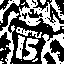

Number of labels: 27
Labels shape: (64, 64)
Stats shape: (27, 5)
Centroids shape: (27, 2)
valid_component: (16, 35, 9, 24, 16)
valid_component: (23, 38, 16, 22, 18)


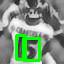

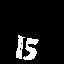

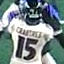

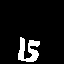

Detected numbers: []


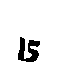

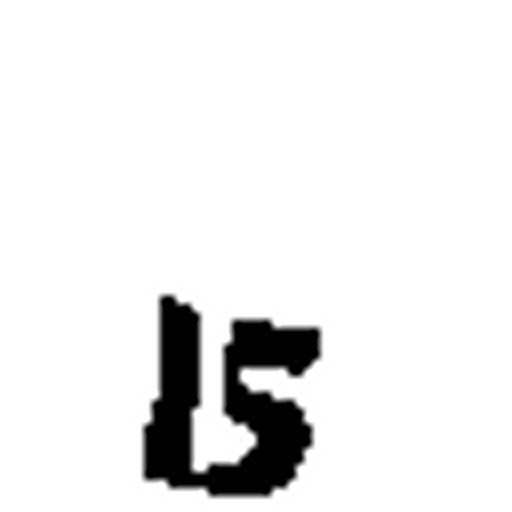

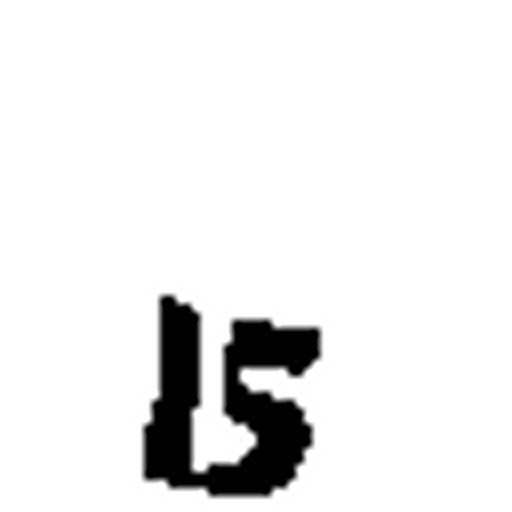

In [ ]:

def preprocess_image(image_path, black_digits=True):
    """Loads and preprocesses the image using connected components approach."""
    # Read image
    image = cv2.imread(image_path)

    # Resize if image is too large
    max_height = 800
    if image.shape[0] > max_height:
        scale = max_height / image.shape[0]
        image = cv2.resize(image, None, fx=scale, fy=scale)

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Enhance contrast
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    gray = clahe.apply(gray)

    # Apply bilateral filter to reduce noise while preserving edges
    if not black_digits:
        gray = cv2.bitwise_not(gray)

    gray = cv2.bilateralFilter(gray, 9, 75, 75)

    # Apply adaptive thresholding
    thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                 cv2.THRESH_BINARY_INV, 11, 2)
    cv2_imshow(thresh)

    # Apply connected components analysis
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh, 4, cv2.CV_32S)

    print("Number of labels:", num_labels)
    print("Labels shape:", labels.shape)
    print("Stats shape:", stats.shape)
    print("Centroids shape:", centroids.shape)

    # Create a mask for filtered components
    mask = np.zeros_like(thresh)

    # Calculate relative size thresholds based on image dimensions
    img_area = thresh.shape[0] * thresh.shape[1]
    min_area = img_area * 0.0005  # 0.05% of image area
    max_area = img_area * 0.05    # 5% of image area

    valid_components = []

    for i in range(1, num_labels):  # Skip background label 0
        area = stats[i, cv2.CC_STAT_AREA]
        width = stats[i, cv2.CC_STAT_WIDTH]
        height = stats[i, cv2.CC_STAT_HEIGHT]

        # Filter based on area and aspect ratio
        if min_area < area < max_area:
            aspect_ratio = width / float(height)
            if 0.2 < aspect_ratio < 0.8:  # Adjusted for digit shapes
                x = stats[i, cv2.CC_STAT_LEFT]
                y = stats[i, cv2.CC_STAT_TOP]
                valid_components.append((x, y, width, height, i))
                print("valid_component:", (x, y, width, height, i))

    # Sort components by x-coordinate to maintain left-to-right order
    valid_components.sort(key=lambda x: x[0])

    # Create a color overlay image
    overlay = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

    # Overlay valid components on the grayscale image
    for x, y, w, h, i in valid_components:  # Take at most 2 components
        cv2.rectangle(overlay, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green bounding box

    # Display the overlay
    cv2_imshow(overlay)

    # Take only the components that are likely to be digits
    for x, y, w, h, i in valid_components:  # Take at most 2 components
        component_mask = (labels == i).astype("uint8") * 255
        mask[y:y+h, x:x+w] = component_mask[y:y+h, x:x+w]

    # Apply the mask
    result = cv2.bitwise_and(thresh, mask)
    cv2_imshow(result)

    # Clean up the result
    kernel = np.ones((2,2), np.uint8)
    result = cv2.morphologyEx(result, cv2.MORPH_CLOSE, kernel)
    result = cv2.morphologyEx(result, cv2.MORPH_OPEN, kernel)

    return result, image


def preprocess_image_v1(image_path):
    """Loads and preprocesses the image using connected components approach."""
    # Read image
    image = cv2.imread(image_path)

    # Resize if image is too large
    max_height = 800
    if image.shape[0] > max_height:
        scale = max_height / image.shape[0]
        image = cv2.resize(image, None, fx=scale, fy=scale)

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Invert the processed image
    gray = cv2.bitwise_not(gray)

    # Enhance contrast
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    gray = clahe.apply(gray)

    # Apply bilateral filter to reduce noise while preserving edges
    gray = cv2.bilateralFilter(gray, 9, 75, 75)

    # Apply adaptive thresholding
    thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                 cv2.THRESH_BINARY_INV, 11, 2)
    cv2_imshow(thresh)

    # Apply connected components analysis
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh, 4, cv2.CV_32S)

    print("Number of labels:", num_labels)
    print("Labels shape:", labels.shape)
    print("Stats shape:", stats.shape)
    print("Centroids shape:", centroids.shape)

    # Create a mask for filtered components
    mask = np.zeros_like(thresh)

    # Calculate relative size thresholds based on image dimensions
    img_area = thresh.shape[0] * thresh.shape[1]
    min_area = img_area * 0.0005  # 0.05% of image area
    max_area = img_area * 0.05    # 5% of image area

    valid_components = []

    for i in range(1, num_labels):  # Skip background label 0
        area = stats[i, cv2.CC_STAT_AREA]
        width = stats[i, cv2.CC_STAT_WIDTH]
        height = stats[i, cv2.CC_STAT_HEIGHT]

        # Filter based on area and aspect ratio
        if min_area < area < max_area:
            aspect_ratio = width / float(height)
            if 0.2 < aspect_ratio < 0.8:  # Adjusted for digit shapes
                x = stats[i, cv2.CC_STAT_LEFT]
                y = stats[i, cv2.CC_STAT_TOP]
                valid_components.append((x, y, width, height, i))
                print("valid_component:", (x, y, width, height, i))

    # Sort components by x-coordinate to maintain left-to-right order
    valid_components.sort(key=lambda x: x[0])

    # Take only the components that are likely to be digits
    for x, y, w, h, i in valid_components[:2]:  # Take at most 2 components
        component_mask = (labels == i).astype("uint8") * 255
        mask[y:y+h, x:x+w] = component_mask[y:y+h, x:x+w]

    # Apply the mask
    result = cv2.bitwise_and(thresh, mask)
    cv2_imshow(result)

    # Clean up the result
    kernel = np.ones((2,2), np.uint8)
    result = cv2.morphologyEx(result, cv2.MORPH_CLOSE, kernel)
    result = cv2.morphologyEx(result, cv2.MORPH_OPEN, kernel)

    return result, image

def extract_jersey_number(processed_image, original_image):
    height, width = processed_image.shape

    # Keep the same ROI as it's working well
    roi = processed_image[int(height * 0.4):int(height * 0.7),
                        int(width * 0.25):int(width * 0.75)]

    # Increase scale slightly
    scale = 2.0
    roi = cv2.resize(roi, None, fx=scale, fy=scale, interpolation=cv2.INTER_CUBIC)

    # Add dilation to make numbers more prominent
    kernel = np.ones((2,2), np.uint8)
    roi = cv2.dilate(roi, kernel, iterations=1)

    # Try multiple PSM modes with Tesseract
    tesseract_configs = [
        "--psm 7 --oem 1 -c tessedit_char_whitelist=0123456789",
        "--psm 8 --oem 1 -c tessedit_char_whitelist=0123456789",
        "--psm 6 --oem 1 -c tessedit_char_whitelist=0123456789"
    ]

    tesseract_results = []
    for config in tesseract_configs:
        text = pytesseract.image_to_string(roi, config=config).strip()
        if text and text.isdigit():
            tesseract_results.append(text)

    # Try EasyOCR with more permissive parameters
    reader = easyocr.Reader(['en'])
    easyocr_result = reader.readtext(
        roi,
        allowlist='0123456789',
        paragraph=False,
        min_size=10,          # Reduced min size
        width_ths=0.5,        # More permissive width threshold
        text_threshold=0.2,   # Lower confidence threshold
        low_text=0.3,         # More sensitive to text
        contrast_ths=0.2      # Lower contrast threshold
    )

    # Combine results
    all_numbers = []
    if tesseract_results:
        all_numbers.extend(tesseract_results)

    for bbox, text, conf in easyocr_result:
        if text.isdigit():  # Removed confidence threshold since image is clean
            all_numbers.append(text)

    print("Detected numbers:", all_numbers)

    # Modified number selection logic
    if all_numbers:
        # Count occurrences of each number
        number_counts = {}
        for num in all_numbers:
            number_counts[num] = number_counts.get(num, 0) + 1

        # First try two-digit numbers
        two_digit_numbers = [n for n in number_counts.keys() if len(n) == 2]
        if two_digit_numbers:
            # Get the most frequent two-digit number
            return max(two_digit_numbers, key=lambda x: number_counts[x])

        # If we have single digits, try to combine them
        single_digits = [n for n in all_numbers if len(n) == 1]
        if len(single_digits) >= 2:
            # Sort digits by frequency and then combine
            sorted_digits = sorted(set(single_digits),
                                key=lambda x: (-number_counts[x], x))[:2]
            return sorted_digits[0] + sorted_digits[1]
        elif single_digits:
            return single_digits[0]

    return None

def extract_jersey(image_path, black_digits=True):
    """Runs the full pipeline, enlarges the processed image, and displays results."""

    processed_image, original_image = preprocess_image(image_path, black_digits)
    cv2_imshow(original_image)
    cv2_imshow(processed_image)
    jersey_number = extract_jersey_number(processed_image, original_image)

    # Invert the processed image
    inverted_image = cv2.bitwise_not(processed_image)
    cv2_imshow(inverted_image)
    # Resize to be larger (2x bigger)
    scale_factor = 8  # Change this value to adjust the enlargement

    enlarged_image = cv2.resize(inverted_image, None, fx=8, fy=8, interpolation=cv2.INTER_CUBIC)

    # Display results
    cv2_imshow(enlarged_image)  # Show the enlarged image

    return enlarged_image  # Return the resized image

# Example Usage:
image_path = '/content/drive/MyDrive/nfl-data/train_player_numbers/57583_000082_Endzone_100_V15.png'  # Replace with your image file path

inverted = extract_jersey(image_path)
cv2_imshow(inverted)

In [ ]:
def get_bounding_boxes(image):
    """Finds bounding boxes of objects in a grayscale image."""
    # Convert to grayscale if necessary
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image

    # Apply thresholding to segment objects
    _, thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # List to store bounding boxes
    bounding_boxes = []

    # Process each detected contour
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        bounding_boxes.append((x, y, w, h))



    return bounding_boxes

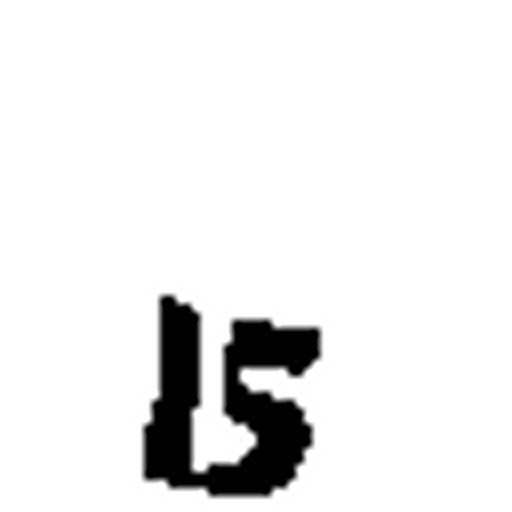

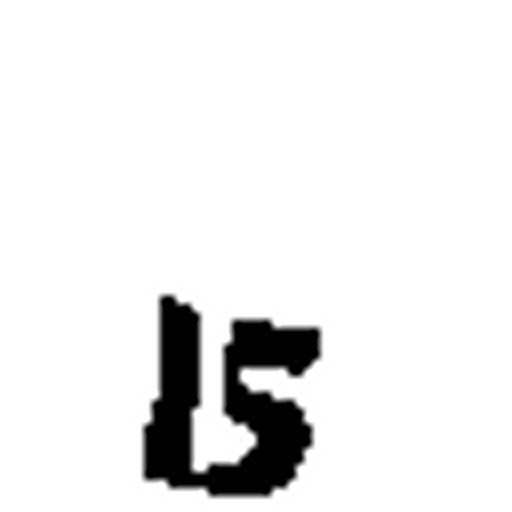

[(143, 295, 178, 202)]


In [ ]:
cv2_imshow( inverted)
bounding_boxes = get_bounding_boxes(inverted)

# Display the image with bounding boxes
cv2_imshow(inverted)

print(bounding_boxes)

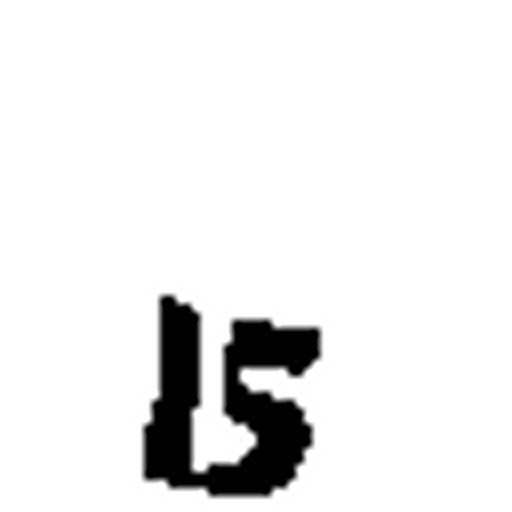

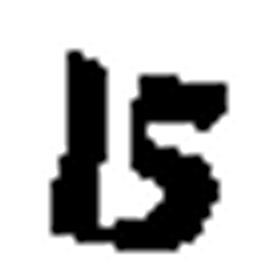

(267, 278)


In [ ]:
def crop_single_bounding_box(image, bounding_box, padding=10):
    """Crops a single region from the image based on a bounding box with extra white space around."""
    h_img, w_img = image.shape[:2]  # Get image dimensions
    x, y, w, h = bounding_box  # Extract bounding box coordinates

    # Add padding while ensuring it doesn't exceed image boundaries
    x_start = max(x - padding, 0)
    y_start = max(y - padding, 0)
    x_end = min(x + w + padding, w_img)
    y_end = min(y + h + padding, h_img)

    # Crop the region with padding
    cropped_image = image[y_start:y_end, x_start:x_end]

    return cropped_image
cv2_imshow(inverted)
cropped = crop_single_bounding_box(inverted, bounding_boxes[0], 50)
cv2_imshow(cropped)
print(cropped.shape)

In [ ]:

_, thresh = cv2.threshold(cropped, 128, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Resize for better OCR accuracy
resized = cv2.resize(thresh, None, fx=4, fy=2, interpolation=cv2.INTER_CUBIC)
image_shape = resized.shape
print(image_shape)
# Perform OCR
custom_config = r'--oem 3 --psm 6'  # PSM 6 assumes a single uniform block of text
recognized_text = pytesseract.image_to_string(resized, config=custom_config, lang='eng')

# Output recognized digits
recognized_text = recognized_text.strip()
print(recognized_text)

char_to_digit = {
        'i': '1', 'I': '1', 'l': '1',
        'S': '5', 'B': '8',
        's': '5',
        'O': '0', 'Q': '0', 'D': '0',
        'Z': '2', 'G': '6',
        'T': '7',
        'E': '3', '8': '3',  # Misreads of 3
        'A': '4', 'H': '4',  # Misreads of 4
        'g': '9', 'q': '9', 'P': '9'  # Misreads of 9
}

def correct_ocr_output(ocr_text):
    # Mapping common misinterpretations
    # Mapping common OCR misinterpretations


    corrected_text = "".join(char_to_digit.get(char, char) for char in ocr_text)
    return corrected_text



# Corrected output
corrected_digits = correct_ocr_output(recognized_text)
print(corrected_digits)

(267, 278)
(534, 1112)
is
15


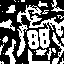

Number of labels: 32
Labels shape: (64, 64)
Stats shape: (32, 5)
Centroids shape: (32, 2)
valid_component: (27, 30, 12, 19, 14)
valid_component: (52, 32, 12, 32, 15)
valid_component: (5, 39, 11, 25, 18)
valid_component: (61, 38, 3, 6, 19)
valid_component: (0, 44, 4, 11, 20)
valid_component: (47, 48, 5, 12, 24)
valid_component: (60, 58, 4, 6, 29)


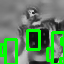

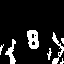

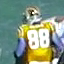

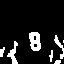

Detected numbers: ['6']


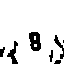

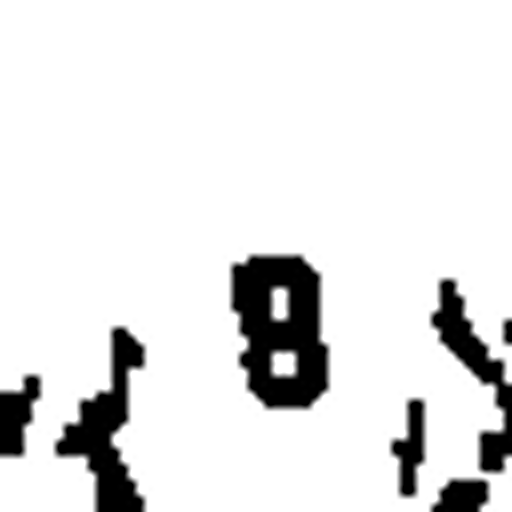

show inverted image now


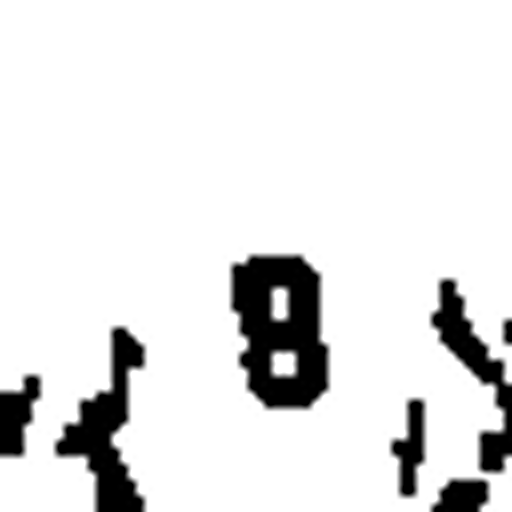

(43, 78)
(86, 312)




In [ ]:
def ocr_pipeline(image_path, black_digits=True):
  inverted = extract_jersey(image_path, black_digits)
  print('show inverted image now')
  cv2_imshow(inverted)
  bounding_boxes = get_bounding_boxes(inverted)
  cropped_bounding_box = crop_single_bounding_box(inverted, bounding_boxes[0], 10)
  print(cropped_bounding_box.shape)
  _, thresh = cv2.threshold(cropped_bounding_box, 128, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

  # Resize for better OCR accuracy
  resized = cv2.resize(thresh, None, fx=4, fy=2, interpolation=cv2.INTER_CUBIC)
  image_shape = resized.shape
  print(image_shape)
  # Perform OCR
  custom_config = r'--oem 3 --psm 6'  # PSM 6 assumes a single uniform block of text
  recognized_text = pytesseract.image_to_string(resized, config=custom_config, lang='eng')

  # Output recognized digits
  recognized_text = recognized_text.strip()
  print(recognized_text)

  result = correct_ocr_output(recognized_text)
  corrected_text = "".join(char_to_digit.get(char, char) for char in result)

  return corrected_text

#image_path = '/content/drive/MyDrive/nfl-data/train_player_numbers/57676_003572_Sideline_220_V24.png'  # Replace with your image file path
image_path = '/content/drive/MyDrive/nfl-data/train_player_numbers/57676_003572_Sideline_220_H88.png'
#image_path = '/content/drive/MyDrive/nfl-data/train_player_numbers/57583_000082_Endzone_100_V15.png'
print(ocr_pipeline(image_path, False))